In [2]:
#!pip install yfinance ta backtesting 

import yfinance as yf 

import matplotlib.pyplot as plt
import pandas as pd
params = {'legend.fontsize': 'x-large',
      'figure.figsize': (12, 6),
      'axes.labelsize': 'x-large',
      'axes.titlesize': 'x-large',
      'xtick.labelsize': 'x-large',
      'ytick.labelsize': 'x-large'}
plt.rcParams.update(params)

get_ipython().run_line_magic('matplotlib', 'inline')

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

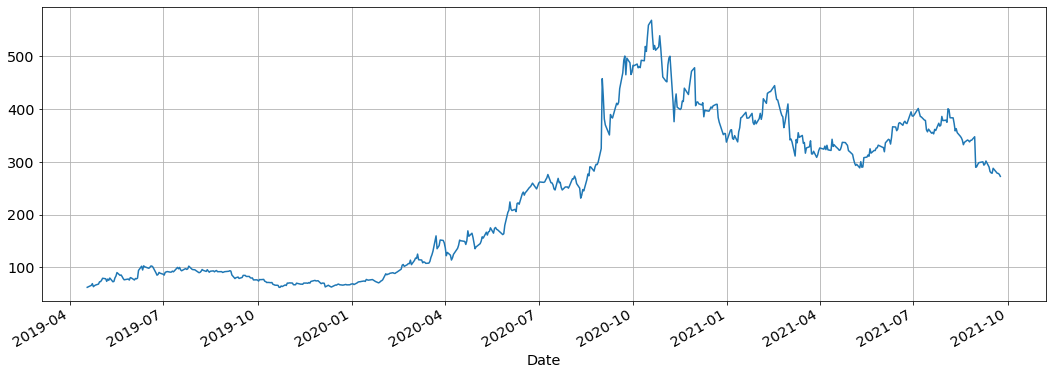

In [3]:
# This program is aim to adopt BollingerBands to design a trading strategy for Zoom(ZM) stock.
# graph the daily historical adjusted close price from Zoom's IPO date, 18, April, 2019  
zoom = yf.download("ZM", start = "2019-04-18")
zoom['Adj Close'].plot.line(figsize = (18, 6), grid = True)

In [4]:
from ta.volatility import BollingerBands
import ta

bb_indicator = BollingerBands(close = zoom['Adj Close'], window = 20, window_dev = 2)
zoom["bbm"] = bb_indicator.bollinger_mavg()
zoom["bbh"] = bb_indicator.bollinger_hband()
zoom["bbl"] = bb_indicator.bollinger_lband()

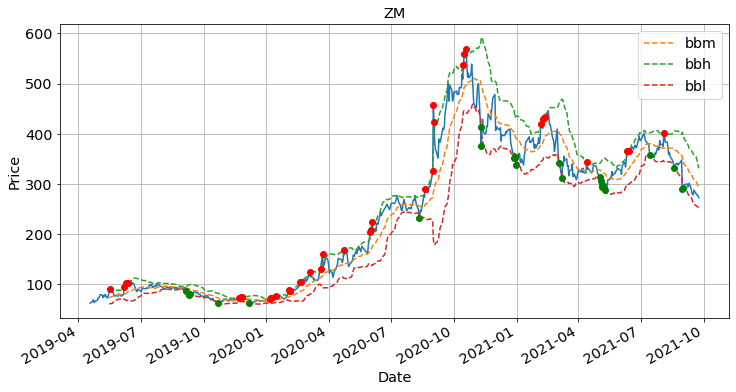

In [5]:
# graph BollingerBand for Zoom stock, red dots represent buy signals, while green dots represnt sell signals
ax = zoom['Adj Close'].plot.line(figsize = (12, 6), ylabel = "Price")
ax = zoom[["bbm", "bbh", "bbl"]].plot.line(ax = ax, linestyle = "--", grid = True, title = "ZM")

bbh_mask = bb_indicator.bollinger_hband_indicator() == 1
bbl_mask = bb_indicator.bollinger_lband_indicator() == 1

plt.plot(zoom['Adj Close'][bbh_mask], "ro")#buy
plt.plot(zoom['Adj Close'][bbl_mask], "go")#sell

In [6]:
from backtesting import Backtest, Strategy

class MyStrategy(Strategy):
    def init(self):
        price = pd.Series(self.data['Adj Close'])
        bb_indicator = BollingerBands(close=price, window=20, window_dev=2)
        self.hband = self.I(bb_indicator.bollinger_hband_indicator)
        self.lband = self.I(bb_indicator.bollinger_lband_indicator)
    def next(self):
        if self.hband:
            self.buy()
        elif self.lband:
            self.sell()

C:\Users\YU SHAN SU\anaconda3\lib\site-packages\backtesting\_plotting.py:47: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [7]:
bt = Backtest(zoom, MyStrategy, commission = .005, cash = 100000, exclusive_orders = True)
stats = bt.run()
bt.plot()

Row(id='1528', ...)

In [8]:
stats

Start                     2019-04-18 00:00:00
End                       2021-09-24 00:00:00
Duration                    890 days 00:00:00
Exposure Time [%]                   96.585366
Equity Final [$]                 86874.577589
Equity Peak [$]                 290716.264826
Return [%]                         -13.125422
Buy & Hold Return [%]              339.290299
Return (Ann.) [%]                   -5.602409
Volatility (Ann.) [%]               76.531566
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -75.77217
Avg. Drawdown [%]                  -18.060243
Max. Drawdown Duration      340 days 00:00:00
Avg. Drawdown Duration       52 days 00:00:00
# Trades                                   62
Win Rate [%]                        59.677419
Best Trade [%]                      50.282953
Worst Trade [%]                    -32.776617
Avg. Trade [%]                    